In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import seaborn as sbn

df=pd.read_csv('trainimp.csv')
df_test=pd.read_csv('testimp.csv')

In [2]:
X_train = df.drop("Survived", axis=1)
y_train = df.Survived

X_test = df_test.copy()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


In [5]:
classifiers = {
    "NB": GaussianNB(),
    "SGD": SGDClassifier(),
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train_scaled, y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

C:\Users\mehmu\AppData\Local\Temp\ipykernel_40924\1442918491.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_40924\1442918491.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_40924\1442918491.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_40924\1442918491.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\mehmu\AppData\Local\Temp\ipykernel_40924\1442918491.py:22: FutureWarnin

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
6,SVM,0.829413,0.762430,0.795922
7,MLP,0.823808,0.758052,0.790930
5,RF,0.823783,0.751283,0.787533
0,NB,0.799126,0.745577,0.772351
2,KNN,0.806954,0.735384,0.771169
3,LR,0.802447,0.731009,0.766728
9,LGBM,0.793521,0.726150,0.759835
8,XGB,0.781186,0.710890,0.746038
4,DT,0.771111,0.688963,0.730037
1,SGD,0.745231,0.679182,0.712206


In [6]:
svm = SVC()
params = {
    "tol": (0.1, 0.01, 0.001, 0.0001,0.00001),
    "C": (10.0, 1.0, 0.1, 0.01)
}
clf = GridSearchCV(svm, params, cv=10)
clf.fit(X_train_scaled, y_train)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'C': 1.0, 'tol': 0.1}


Train Accuracy: 0.8395061728395061
Train F1-Score: 0.7803379416282642


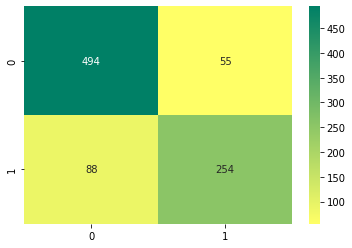

In [7]:
y_pred = clf.predict(X_train_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Train F1-Score: {f1_score(y_train, y_pred)}")
sbn.heatmap(confusion_matrix(y_train, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

In [8]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



In [9]:
y_pred = clf.predict(X_test_scaled)

submission = pd.read_csv("gender_submission.csv")
submission["Survived"] = y_pred
submission.to_csv('submission.csv', index=False)

In [10]:
!kaggle competitions submit -c titanic -f submission.csv -m ""

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|██████████| 3.18k/3.18k [00:00<00:00, 29.7kB/s]
100%|██████████| 3.18k/3.18k [00:01<00:00, 2.22kB/s]
